In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [2]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

['hilo',
 'pacific grove',
 'taolanaro',
 'puerto ayora',
 'arraial do cabo',
 'klaksvik',
 'cabo san lucas',
 'nova russas',
 'teeli',
 'ahipara',
 'yarada',
 'vaitupu',
 'tiznit',
 'namibe',
 'rikitea',
 'nikolskoye',
 'punta arenas',
 'khatanga',
 'beisfjord',
 'hermanus',
 'mahebourg',
 'albany',
 'sorland',
 'ushuaia',
 'busselton',
 'yeletskiy',
 'mahon',
 'vaini',
 'norman wells',
 'bethel',
 'bluff',
 'kochi',
 'cape town',
 'goure',
 'butaritari',
 'thompson',
 'tabas',
 'atuona',
 'warqla',
 'mataura',
 'yellowknife',
 'severo-kurilsk',
 'cidreira',
 'labuhan',
 'jamestown',
 'vardo',
 'provideniya',
 'taltal',
 'batagay-alyta',
 'east london',
 'nome',
 'illoqqortoormiut',
 'kapaa',
 'adrar',
 'mar del plata',
 'hobart',
 'acapulco',
 'antofagasta',
 'gobabis',
 'saint-joseph',
 'asfi',
 'arman',
 'point pleasant',
 'monatele',
 'mbeya',
 'axim',
 'new norfolk',
 'balaghat',
 'bolungarvik',
 'bambous virieux',
 'nizhneyansk',
 'ribeira grande',
 'tasiilaq',
 'kutum',
 'udach

In [9]:
# Perform API Calls
query_url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"
response = requests.get(f"{query_url}&q=klaksvik").json()
response

{'coord': {'lon': -6.59, 'lat': 62.23},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 39.2,
  'feels_like': 22.87,
  'temp_min': 39.2,
  'temp_max': 39.2,
  'pressure': 1000,
  'humidity': 80},
 'visibility': 10000,
 'wind': {'speed': 23.04, 'deg': 300, 'gust': 36.91},
 'clouds': {'all': 100},
 'dt': 1579316762,
 'sys': {'type': 1,
  'id': 1596,
  'country': 'FO',
  'sunrise': 1579339708,
  'sunset': 1579362257},
 'timezone': 0,
 'id': 2618795,
 'name': 'Klaksvik',
 'cod': 200}

In [10]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
latitude = []
longitude = []
hottest = []
wind = []
record = 1

for city in cities:
    try:
        response = requests.get(f"{query_url}&q={city}").json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        hottest.append(response["main"]["temp_max"])
        wind.append(response["wind"]["speed"])
        city_response = response["name"]
        print(f"Processing {record} for city: {city_response}")
        record = record + 1
        time.sleep(1)
    except:
        print("City Not Found")
    continue

Processing 1 for city: Hilo
Processing 2 for city: Pacific Grove
City Not Found
Processing 3 for city: Puerto Ayora
Processing 4 for city: Arraial do Cabo
Processing 5 for city: Klaksvik
Processing 6 for city: Cabo San Lucas
Processing 7 for city: Nova Russas
Processing 8 for city: Teeli
Processing 9 for city: Ahipara
Processing 10 for city: Yarada
City Not Found
Processing 11 for city: Tiznit
Processing 12 for city: Mossamedes
Processing 13 for city: Rikitea
Processing 14 for city: Nikolskoye
Processing 15 for city: Punta Arenas
Processing 16 for city: Khatanga
Processing 17 for city: Beisfjord
Processing 18 for city: Hermanus
Processing 19 for city: Mahebourg
Processing 20 for city: Albany
Processing 21 for city: Sorland
Processing 22 for city: Ushuaia
Processing 23 for city: Busselton
City Not Found
Processing 24 for city: Mahon
Processing 25 for city: Vaini
Processing 26 for city: Norman Wells
Processing 27 for city: Bethel
Processing 28 for city: Bluff
Processing 29 for city: Koch

Processing 232 for city: Ossora
Processing 233 for city: Broome
Processing 234 for city: Obidos
Processing 235 for city: Goma
Processing 236 for city: Miguel Calmon
Processing 237 for city: Chokurdakh
Processing 238 for city: Lynden
Processing 239 for city: Shubarkuduk
Processing 240 for city: Kavieng
Processing 241 for city: Flin Flon
Processing 242 for city: Trat
Processing 243 for city: Oddur
Processing 244 for city: Ejido
Processing 245 for city: Avanuorri
Processing 246 for city: Mafinga
Processing 247 for city: Mount Isa
City Not Found
Processing 248 for city: Upernavik
Processing 249 for city: Verkhnevilyuysk
Processing 250 for city: Cojutepeque
Processing 251 for city: Rundu
Processing 252 for city: Yong'an
Processing 253 for city: Monrovia
Processing 254 for city: Bairiki Village
Processing 255 for city: Rome
Processing 256 for city: Surazh
Processing 257 for city: Pemberton
Processing 258 for city: Ciudad Lazaro Cardenas
Processing 259 for city: Balagunan
Processing 260 for c

Processing 460 for city: Cap Malheureux
Processing 461 for city: Nicoya
Processing 462 for city: Sangar
Processing 463 for city: Camabatela
Processing 464 for city: Ishigaki
Processing 465 for city: Sao Geraldo do Araguaia
Processing 466 for city: Arkhara
Processing 467 for city: Maniitsoq
Processing 468 for city: Khujand
Processing 469 for city: Katsuura
Processing 470 for city: Nacala
Processing 471 for city: Meulaboh
Processing 472 for city: Bafoulabe
Processing 473 for city: Tocopilla
Processing 474 for city: Bartica
Processing 475 for city: Sabang
Processing 476 for city: Samarai
Processing 477 for city: Geraldton
Processing 478 for city: Maniwaki
Processing 479 for city: Santa Isabel
Processing 480 for city: Burnie
Processing 481 for city: Donskoye
Processing 482 for city: Belem
Processing 483 for city: Dicabisagan
Processing 484 for city: Padang
Processing 485 for city: Tamboril
City Not Found
Processing 486 for city: Moussoro
Processing 487 for city: Grootfontein
Processing 488

In [18]:
#Convert Raw Data to DataFrame
#Export the city data into a .csv.
#Display the DataFrame
weather_df = pd.DataFrame({
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Latitude":latitude, 
    "Longitude":longitude, 
    "Max Temperature": hottest,
    "Wind Speed":wind
})
weather_df.to_csv(output_data_file)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Hilo,90,US,1579316804,73,19.73,-155.09,75.20,16.11
1,Pacific Grove,1,US,1579316589,81,36.62,-121.92,50.00,6.93
2,Puerto Ayora,27,EC,1579316807,66,-0.74,-90.35,77.00,1.01
3,Arraial do Cabo,100,BR,1579316808,78,-22.97,-42.03,75.56,18.59
4,Klaksvik,100,FO,1579316762,80,62.23,-6.59,39.20,23.04


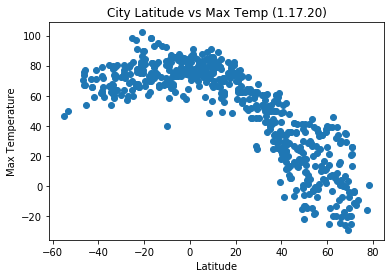

In [24]:
plt.scatter(weather_df["Latitude"], weather_df["Max Temperature"], marker="o")

plt.title("City Latitude vs Max Temp (1.17.20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.savefig("output_data/latitude_max_temp.png")
plt.show()

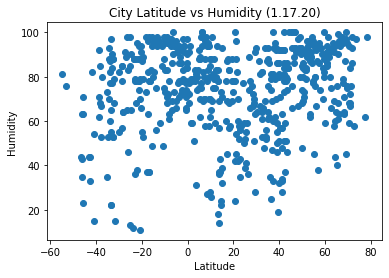

In [25]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o")

plt.title("City Latitude vs Humidity (1.17.20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("output_data/latitude_humidity.png")
plt.show()

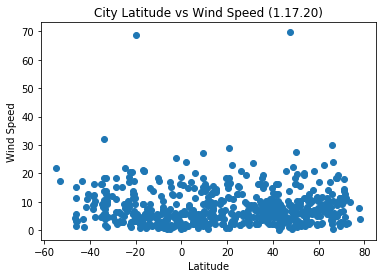

In [26]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker="o")

plt.title("City Latitude vs Wind Speed (1.17.20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("output_data/latitude_wind_speed.png")
plt.show()